In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
dataset = pd.read_csv("UberDataset.csv")
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [39]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [43]:
dataset.shape


(1156, 7)

In [45]:
dataset.isnull()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [30]:
dataset['PURPOSE'].fillna("NOT available",inplace=True)
dataset

C:\Users\Rakhesh\AppData\Local\Temp\ipykernel_20608\3122792967.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT available",inplace=True)


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT available
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [55]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], 
                                       errors='coerce')
dataset
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], 
                                     errors='coerce')
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [59]:
dataset['date'] = pd.to_datetime(dataset['START_DATE']).dt.date
dataset['time'] = pd.to_datetime(dataset['START_DATE']).dt.hour

dataset['day-night'] = pd.cut(
    x=dataset['time'],
    bins=[0, 10, 15, 19, 24],
    labels=['Morning', 'Afternoon', 'Evening', 'Night'],
    right=False 
)
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17,Evening
...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17,Evening


In [60]:
dataset.dropna(inplace=True)
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17,Evening
...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17,Evening


In [38]:
dataset.drop_duplicates(inplace=True)
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT available
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices')])

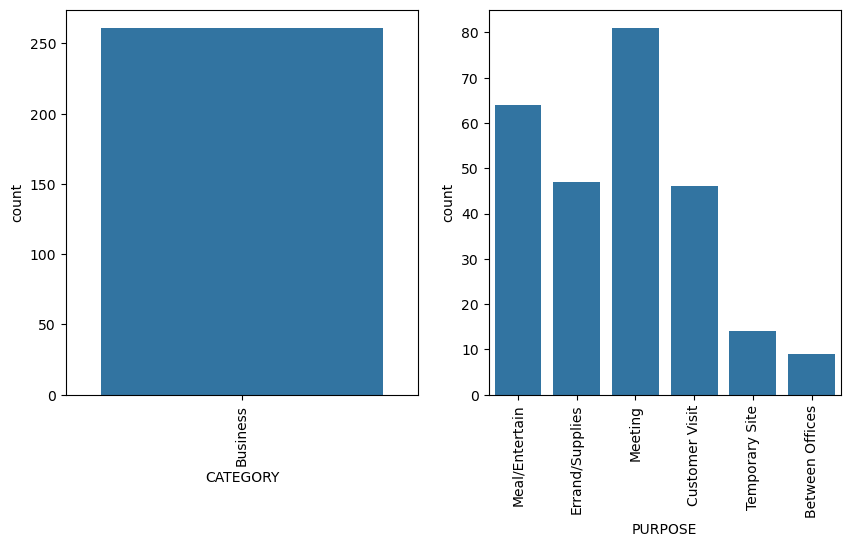

In [61]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=dataset['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x=dataset['PURPOSE'])
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

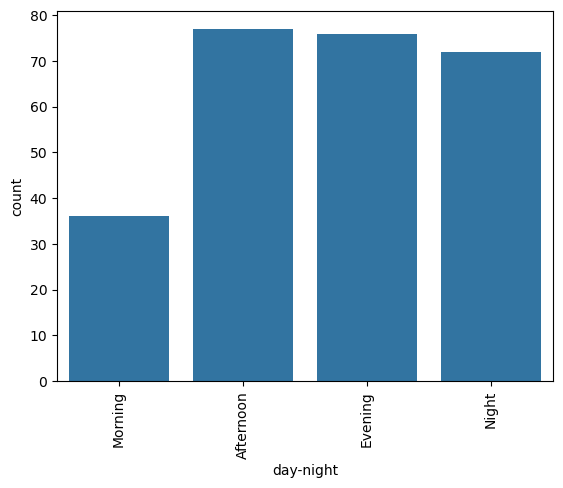

In [62]:
sns.countplot(x=dataset['day-night'])
plt.xticks(rotation=90)

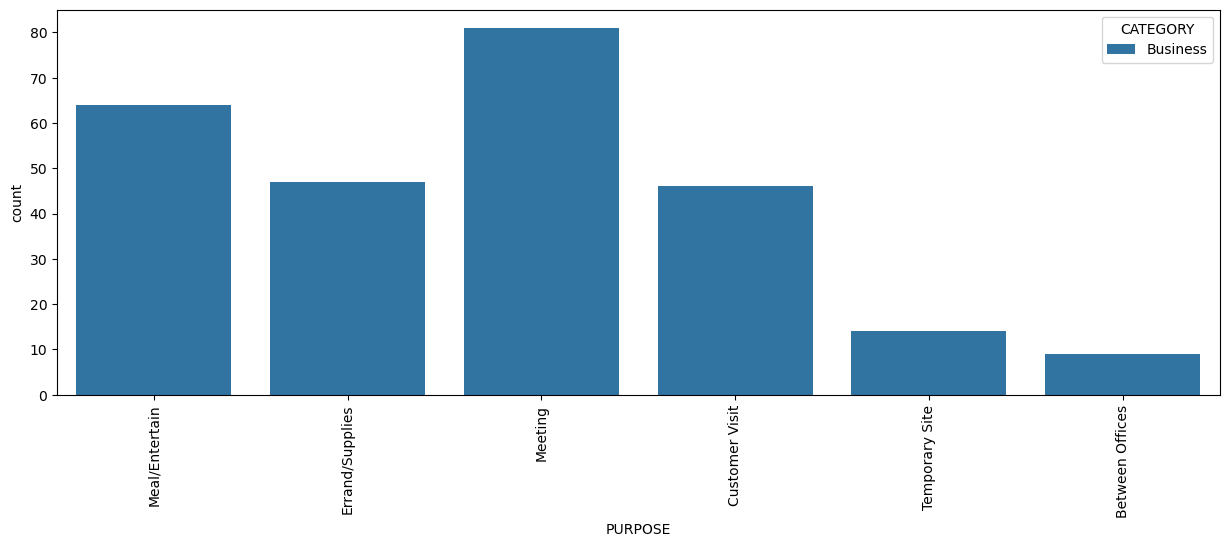

In [63]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

<Axes: >

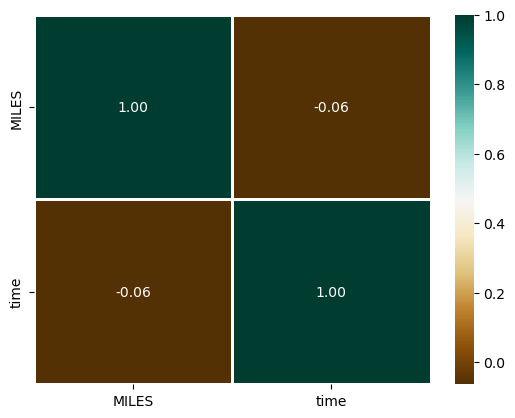

In [64]:

numeric_dataset = dataset.select_dtypes(include=['number'])
sns.heatmap(numeric_dataset.corr(), 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)

